In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
# clean data, drop duplicates, replace missing values, delete redundunt symbols
clean_regions['Oblast'] = regions["Oblast"].str.replace("[^a-zA-Z0-9]", "", regex=True)
clean_regions = clean_regions.fillna(0)
clean_regions.drop_duplicates(['Oblast'], inplace=True)
clean_regions

,index,Oblast,Livelihood_Score
0,0,Chernihivska,39.0
1,1,Khmelnytska,45.0
2,2,Kyivcity,50.0
3,3,IvanoFrankivska,49.0
4,4,Sumska,75.0
5,5,Zakarpatska,0.0
6,6,Donetska,76.0
7,7,Khersonska,57.0
8,8,Kyivska,90.0
9,9,Odeska,0.0


In [198]:
# sort data by severity value
sorted_regions = clean_regions.sort_values("Livelihood_Score", ascending=False)
sorted_regions 

,index,Oblast,Livelihood_Score
8,8,Kyivska,90.0
19,19,Lvivska,80.0
18,18,Kirovohradska,78.0
17,17,Kharkivska,77.0
6,6,Donetska,76.0
25,25,Zhytomyrska,75.0
4,4,Sumska,75.0
24,24,Zaporizka,74.0
22,22,Rivnenska,72.0
16,16,Dnipropetrovska,66.0


In [204]:
# add column with the severity graduation
sorted_regions["Severity"] = sorted_regions["Livelihood_Score"].apply(lambda x: "High" if x > 75 else ("Medium" if 49 < x <= 75 else "Low"))
final_regions = sorted_regions

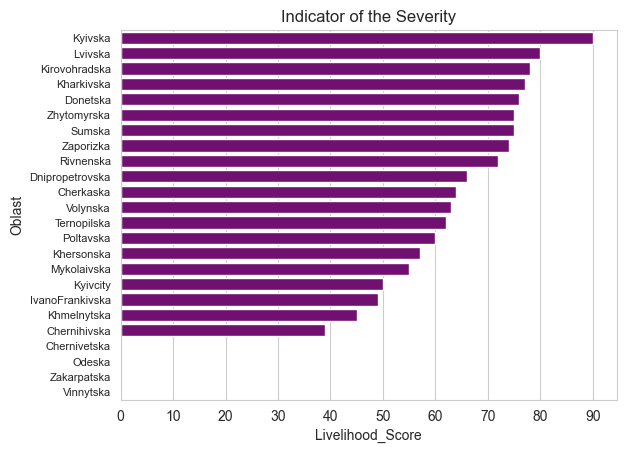

In [205]:
# visualize severity indicators by oblasts
sns.set_style("whitegrid")
sns.barplot(data=final_regions, x="Livelihood_Score", y="Oblast",  color='purple',
            errorbar=None)
plt.title("Indicator of the Severity")
plt.gca().tick_params(axis='y', labelsize=8)
plt.xticks(np.arange(0, sorted_regions['Livelihood_Score'].max() + 10, 10))
plt.show()